In [71]:
# import packages
import h5py # read h5

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from matplotlib import rc
from cycler import cycler

import numpy as np
import pandas as pd

from merge_h5_files import merge_preserve_time
import os
import glob

# download and install Dr. Jin's python package, click the url below for more details
# !git clone https://github.com/jinwar/jin_pylib

from jin_pylib import gjsignal
from jin_pylib import Data2D_XT


# merge dataset

In [2]:
# Read h5 files
# f1 = h5py.File('C:/Users/fengxiang.mao/Desktop/Devon data/HFTS-1_Devon/20220707/Evo 3 (refrac)/Neubrex_DSS_strain/Zgabay A14H - refrac - strain change.h5','r')
# f1 = h5py.File('C:/Users/fengxiang.mao/Desktop/HFTS2_dataset/stage6/sensor_2019-04-01T180047Z.h5','r')
f1 = h5py.File('C:/Users/fengxiang.mao/Desktop/HFTS2_dataset/stage22/sensor_2019-04-07T033627Z.h5','r')
print(list(f1.keys()))
# 继续进入下一层
data_group = f1['Acquisition']['Raw[0]']['RawData']
print(data_group)
# print(list(data_group.keys()))
# 继续进入下一层
# data_group2 = data_group['Raw[0]']
# print(list(data_group2.keys()))
# 继续进入下一层
# RawData = data_group2['RawData']
# print(RawData)
# RawDataTime = data_group2['RawDataTime']
# print(RawDataTime)

['Acquisition']
<HDF5 dataset "RawData": shape (6100, 30), type "<i4">


In [72]:

# folder  = r"C:/Users/fengxiang.mao/Desktop/HFTS2_dataset/stage22"
# folder  = r"C:/Users/fengxiang.mao/Desktop/HFTS2_dataset/Anadarko_B2H_(B4H)_CWC/Input/0.1 Hz Diff"
folder  = r"C:/Users/fengxiang.mao/Desktop/HFTS2_dataset/Anadarko_B1H_(B4H)_CWC_Stages_8_-_33/Input/FBE 0.1 Hz Diff/S17"


pattern = "sensor_*.h5"  # 或者 "*.h5"
out_h5  = os.path.join(folder, "merged_B1H_(B4H)_S17.h5")

files = sorted(glob.glob(os.path.join(folder, pattern)))
assert files, f"在 {folder} 未找到匹配 {pattern} 的文件。"


# Merge HFTS2 h5 files while preserving time information
# （depth, time）no need to transpose
merge_preserve_time(files, out_h5,
                    expected_depth=6100,
                    expected_T_per_file=30,
                    sort_by_time=True,
                    compression=None)  # 需要压缩可设 'gzip', compression_opts=4


合并完成：C:/Users/fengxiang.mao/Desktop/HFTS2_dataset/Anadarko_B1H_(B4H)_CWC_Stages_8_-_33/Input/FBE 0.1 Hz Diff/S17\merged_B1H_(B4H)_S17.h5
  /Acquisition/Raw[0]/RawData 形状: (6100, 3270)
  /Acquisition/Raw[0]/RawDataTime 形状: (3270,)
  还写入了 /Acquisition/FileNames 与 /Acquisition/FileOffsets（便于追溯映射）


In [5]:
for f in files:
    with h5py.File(f, "r") as h:
        raw = h["Acquisition"]["Raw[0]"]["RawData"][...]
        print(os.path.basename(f), raw.shape)


sensor_2019-04-01T175903Z.h5 (6100, 30)
sensor_2019-04-01T180403Z.h5 (6100, 30)
sensor_2019-04-01T180903Z.h5 (6100, 30)
sensor_2019-04-01T181403Z.h5 (6100, 30)
sensor_2019-04-01T181903Z.h5 (6100, 30)
sensor_2019-04-01T182403Z.h5 (6100, 30)
sensor_2019-04-01T182903Z.h5 (6100, 30)
sensor_2019-04-01T183403Z.h5 (6100, 30)
sensor_2019-04-01T183903Z.h5 (6100, 30)
sensor_2019-04-01T184403Z.h5 (6100, 30)
sensor_2019-04-01T184903Z.h5 (6100, 30)
sensor_2019-04-01T185403Z.h5 (6100, 30)
sensor_2019-04-01T185903Z.h5 (6100, 30)
sensor_2019-04-01T190403Z.h5 (6100, 30)
sensor_2019-04-01T190903Z.h5 (6100, 30)
sensor_2019-04-01T191403Z.h5 (6100, 30)
sensor_2019-04-01T191903Z.h5 (6100, 30)
sensor_2019-04-01T192403Z.h5 (6100, 30)
sensor_2019-04-01T192903Z.h5 (6100, 30)
sensor_2019-04-01T193403Z.h5 (6100, 30)
sensor_2019-04-01T193903Z.h5 (6100, 30)
sensor_2019-04-01T194403Z.h5 (6100, 30)
sensor_2019-04-01T194903Z.h5 (6100, 30)
sensor_2019-04-01T195403Z.h5 (6100, 30)
sensor_2019-04-01T195903Z.h5 (6100, 30)


# overall


In [6]:
# import packages
import h5py # read h5

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from matplotlib import rc
from cycler import cycler
from depth_and_time_cut import subset_dstrain_by_time_ranges, subset_dstrain_by_md_ranges
from matplotlib.colors import TwoSlopeNorm
from matplotlib.ticker import MultipleLocator, FuncFormatter, MaxNLocator, ScalarFormatter, FixedLocator, LogFormatter

import numpy as np
import pandas as pd


# download and install Dr. Jin's python package, click the url below for more details
# !git clone https://github.com/jinwar/jin_pylib

from jin_pylib import gjsignal
from jin_pylib import Data2D_XT


In [7]:
# Read h5 files
# f1 = h5py.File('C:/Users/fengxiang.mao/Desktop/Devon data/HFTS-1_Devon/20220707/Evo 3 (refrac)/Neubrex_DSS_strain/Zgabay A14H - refrac - strain change.h5','r')
# merged_data = h5py.File('C:/Users/fengxiang.mao/Desktop/HFTS2_dataset/stage6/merged_stage6_preserve_time.h5','r')
merged_data = h5py.File('C:/Users/fengxiang.mao/Desktop/HFTS2_dataset/Anadarko_B2H_(B4H)_CWC/Input/0.1 Hz Diff/S6/merged_B1H_(B4H)_S6.h5','r')


print(list(merged_data.keys()))

['Acquisition']


In [8]:
# Assign variables
pchange = (merged_data['Acquisition']['Raw[0]']['RawData'])
# depth = (f1['depth'])
time_relative = (merged_data['Acquisition']['Raw[0]']['RawDataTime'])

# use panda package
print(pd.DataFrame(pchange))
print(pd.DataFrame(time_relative))

        0        1       2       3       4       5       6        7     \
0     -51391   -36957     490   53855  -12971   -3779  -41155   -83708   
1       6829     6184  -34397  -83268  -24033    2353  -13835    50250   
2     333375   382830  213535  199768  202988  136851  371026   442562   
3     513177   538285  403002  248959 -148475 -155910  562628  1357513   
4     973541  1105407  918889  388229 -465906 -405476  636013  1895493   
...      ...      ...     ...     ...     ...     ...     ...      ...   
6095    5395    -8648  -19306   -2406   38398   37001   64182    92390   
6096    4888    54706   24511   -7156    5468    2192  -23180     1547   
6097   39920    12300    8744    1131   -7440    3803  -26998   101794   
6098 -123842   -17867     872  -12743    8542   -1508  -19671   -24073   
6099    7942   -10174  -11244  -10111   24633   15737  -69333   -30066   

         8       9     ...    2180    2181    2182    2183    2184    2185  \
0       -5652   -3641  ...  -1168

In [ ]:
# start = pd.Timestamp("2019-03-30 18:00:28")
# end   = pd.Timestamp("2019-04-09 16:52:43")
# realtime = pd.to_datetime(time_relative, unit='us')
# mask = (realtime >= start) & (realtime <= end)
# t_cut = realtime[mask]

In [9]:
# convert the strain data to numpy array
pchange = np.array(pchange)
print(pchange.shape)


# convert optical phase change into strain change
def phase_to_strain(arr):
    probe_wave_length = 1550e-9
    refractive_index = 1.4682
    scalar_multi_factor = 0.78
    gauge_length = 7.1467
    stored_value = 104300.4       #stored data unit rad/10430

    return probe_wave_length/(4*np.pi*refractive_index*scalar_multi_factor*gauge_length)*(arr/stored_value)

dstrain = phase_to_strain(pchange)

print(dstrain)

(6100, 2190)
[[-7.42570265e-09 -5.34007302e-09  7.08021696e-11 ...  1.21678586e-09
   2.00268994e-10 -1.21808631e-09]
 [ 9.86751053e-10  8.93552279e-10 -4.97016781e-09 ...  1.65155453e-08
   1.99451157e-08  1.92321812e-10]
 [ 4.81707618e-08  5.53167236e-08  3.08545740e-08 ... -3.57949760e-08
  -1.23938475e-08  2.14414978e-09]
 ...
 [ 5.76820941e-09  1.77727895e-09  1.26345749e-09 ...  2.54598822e-10
  -3.70772178e-10  3.69760718e-10]
 [-1.78944536e-08 -2.58167829e-09  1.25998963e-10 ... -1.33816100e-09
   7.05232957e-09  2.78498167e-09]
 [ 1.14757312e-09 -1.47008423e-09 -1.62469305e-09 ... -1.01286116e-08
   1.70387588e-09 -2.60031805e-09]]


In [10]:
# Parameters
sp_resolution = 1.0209523439407349    # Spatial resolution, m
time_resolution = 10     # Time resolution, s
optical_dis_top = 327.20279999999997  # Optical distance to top, m
optical_dis_end = 6198.7121136000005  # Optical distance to bottom, m
physical_dis_top = -4.440892098500626E-15      # Physical distance to top, m
physical_dis_end = 5840.0656312500005  # Physical distance to bottom, m
kelly_bushing = 7.9248   # Kelly bushing height, m


# Convert meters to feet
def meters_to_feet(meters):
    return meters * 3.28084

sp_resolution_ft = meters_to_feet(sp_resolution)
optical_dis_top_ft = meters_to_feet(optical_dis_top)
optical_dis_end_ft = meters_to_feet(optical_dis_end)
physical_dis_top_ft = meters_to_feet(physical_dis_top)
physical_dis_end_ft = meters_to_feet(physical_dis_end)
kelly_bushing_ft = meters_to_feet(kelly_bushing)


# Compute MD (measured depth) for a range of channel counts in a vectorized way
min_channels = 0
max_channels = 6099
channels = np.arange(min_channels, max_channels + 1)
fiber_MD = channels * sp_resolution_ft 
MD = (fiber_MD - optical_dis_top_ft) * (physical_dis_end_ft - physical_dis_top_ft) / (optical_dis_end_ft - optical_dis_top_ft)  + kelly_bushing_ft

print(MD)
print(MD.shape)

[-1041.75112088 -1038.4194776  -1035.08783432 ... 19271.27796929
 19274.60961257 19277.94125585]
(6100,)


In [11]:

ranges = MD
ranges = [(17580, 18000)]

# 已有：dstrain.shape == (N_ch, N_t)、MD.shape == (N_ch,)
# ranges 用 MD（ft）指定

# A) 推荐：严格按 MD 边界插值（边界精确）
# data_sub, md_sub, meta = subset_dstrain_by_md_ranges(
#     dstrain, MD, ranges,
#     method="interp",
#     keep_gaps=True,   # 区间之间空白隔开，瀑布图更清晰
#     gap_rows=2,
# )

# B) 若追求速度且能接受边界落到最近 channel：
data_sub, md_sub, meta = subset_dstrain_by_md_ranges(dstrain, MD, ranges, method="nearest_channel", keep_gaps=True)


In [12]:
print(data_sub.shape)
print(md_sub.shape)
print(data_sub)


(126, 2190)
(126,)
[[ 2.09516624e-11 -1.73682057e-10 -1.69925207e-10 ...  3.16442350e-11
   2.51419949e-11  4.60936573e-11]
 [ 7.51369963e-12 -2.07638199e-10 -1.73971045e-10 ...  4.04583826e-12
   9.82560721e-12  5.96761144e-11]
 [ 2.45640180e-11 -1.35535582e-10 -1.27299411e-10 ...  3.67015328e-11
   4.55156804e-11  1.54897808e-10]
 ...
 [ 5.38963454e-11 -7.12356522e-11 -8.33731670e-11 ... -1.01145957e-12
  -6.01095970e-11 -2.42750296e-11]
 [-1.53163877e-11 -1.59666117e-10 -1.67468805e-10 ... -8.84304648e-11
  -5.89536432e-11 -1.54608819e-11]
 [-7.23916060e-11 -2.68470267e-10 -2.22954587e-10 ...  3.69905212e-11
  -4.24813017e-11 -8.69855226e-11]]


In [13]:
t_intrvl = 10  # time interval in seconds
t_axis =  t_intrvl * np.arange(dstrain.shape[-1])          # array([1, 146, 291, ...])
t_axis = t_axis.tolist() 
print(t_axis)
print(type(t_axis))
start_time = datetime.datetime(2019,4,1,18,00,28)

# start_time = datetime.datetime(2019,4,7,3,31,27)
# start_time = datetime.datetime(2019,4,7,1,51,27)
# print(start_time)


[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090, 1100, 1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190, 1200, 1210, 1220, 1230, 1240, 1250, 1260, 1270, 1280, 1290, 1300, 1310, 1320, 1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410, 1420, 1430, 1440, 1450, 1460, 1470, 1480, 1490, 1500, 1510, 1520, 1530, 1540, 1550, 1560, 1570, 1580, 1590, 1600, 1610, 1620, 1630, 1640, 1650, 1660, 1670, 1680, 1690, 1700, 1710, 1720, 1730, 1740, 1750, 1760, 1770, 1780, 1790, 1800, 1810, 1820, 1830, 1840, 

In [14]:

# 例1：用“相对秒”指定两段
# ranges_t = [(0, 3600), (7200, 7800)]   # [0, 1h] 和 [2h, 2h10m]

# 例2：用“绝对时间”指定（需要 start_time）
from datetime import timedelta
ranges_t = [(start_time + timedelta(minutes=0), datetime.datetime(2019,4,2,00,00,43))]
# ranges_t = [(start_time + timedelta(minutes=0), datetime.datetime(2019,4,7,10,6,27))]    #这个时间是文件开始的时间，里面还有29个intervals

# ranges_t = [(start_time + timedelta(minutes=5), start_time + timedelta(minutes=30)),
#             (start_time + timedelta(hours=2),  start_time + timedelta(hours=2, minutes=10))]

# A) 边界精确（推荐）
# data_tsub, t_sub, tmeta = subset_dstrain_by_time_ranges(
#     data_sub, t_axis, ranges_t,
#     start_time=start_time,
#     method="interp",
#     keep_gaps=True,
#     gap_cols=2,
#     include_endpoints=True
# )

# B) 速度优先（不插值）
data_tsub, t_sub, tmeta = subset_dstrain_by_time_ranges(
    data_sub, t_axis, ranges_t, start_time=start_time, method="nearest", keep_gaps=True
)


In [15]:
import numpy as np
import pandas as pd

# t：把你的 t_axis 统一成“相对秒”的 ndarray
t = np.asarray(t_axis, dtype=float)
dt = float(np.median(np.diff(t)))  # 估计采样间隔，应≈10

# 把你传给函数的 ranges_t（若是绝对时间）也转为“相对秒”
def to_rel_s(r, start_time):
    lo, hi = r
    lo = (pd.to_datetime(lo) - pd.to_datetime(start_time)).total_seconds()
    hi = (pd.to_datetime(hi) - pd.to_datetime(start_time)).total_seconds()
    return lo, hi

# 如果你的 ranges_t 就是相对秒，这步就不用
lo, hi = to_rel_s(ranges_t[0], start_time)

print("t[0], t[-1], dt =", t[0], t[-1], dt)
print("你给的区间(秒)   =", lo, hi)
print("左侧被裁掉列数 =", np.sum(t < lo))
print("右侧被裁掉列数 =", np.sum(t > hi))


t[0], t[-1], dt = 0.0 21890.0 10.0
你给的区间(秒)   = 0.0 21615.0
左侧被裁掉列数 = 0
右侧被裁掉列数 = 28


In [16]:
print(data_tsub.shape)

(126, 2162)


In [17]:
import numpy as np
from numpy.lib.stride_tricks import sliding_window_view

def _rolling_median_time(x, win):
    """沿时间轴滚动中位数，忽略 NaN；边界用 edge 填充。x: (n_ch, n_t)"""
    if win < 3 or win % 2 == 0:
        raise ValueError("win 应是 >=3 的奇数")
    pad = win // 2
    xp = np.pad(x, ((0,0),(pad,pad)), mode='edge')
    # 关键修正：window_shape
    w = sliding_window_view(xp, window_shape=win, axis=1)  # (n_ch, n_t, win)
    med = np.nanmedian(w, axis=-1)
    return med

def _rolling_mean_time_nanaware(x, win):
    """沿时间轴移动平均（对 NaN 做权重归一），x: (n_ch, n_t)"""
    if win < 3 or win % 2 == 0:
        raise ValueError("win 应是 >=3 的奇数")
    kernel = np.ones(win, dtype=float)
    pad = win // 2
    x0 = np.pad(np.where(np.isfinite(x), x, 0.0), ((0,0),(pad,pad)), mode='edge')
    w0 = np.pad(np.where(np.isfinite(x), 1.0, 0.0), ((0,0),(pad,pad)), mode='edge')
    # 逐通道一维卷积
    val = np.apply_along_axis(lambda m: np.convolve(m, kernel, mode='valid'), 1, x0)
    cnt = np.apply_along_axis(lambda m: np.convolve(m, kernel, mode='valid'), 1, w0)
    out = val / np.maximum(cnt, 1e-12)
    # 原位是 NaN 的位置保持 NaN（避免填补 gap）
    out[~np.isfinite(x)] = np.nan
    return out

def _median_depth_nanaware(x, win=3):
    """沿深度（通道轴=0）做极轻的中值滤波，去椒盐点；对 NaN 友好。"""
    if win < 3 or win % 2 == 0:
        raise ValueError("win 应是 >=3 的奇数")
    pad = win // 2
    xp = np.pad(x, ((pad,pad),(0,0)), mode='edge')
    # 关键修正：window_shape，且不要 moveaxis
    w = sliding_window_view(xp, window_shape=win, axis=0)  # (n_ch, n_t, win)
    med = np.nanmedian(w, axis=-1)                         # 沿窗口轴取中位
    med[~np.isfinite(x)] = np.nan
    return med

def despike_mad_time(x, win=5, k=6.0):
    """
    MAD 去尖峰（沿时间轴）。win:奇数窗口；k: 阈值倍数（常用 5~8）。
    只替换超过 k*MAD 的离群点为局部中位数。
    """
    med = _rolling_median_time(x, win)
    dev = x - med
    mad = _rolling_median_time(np.abs(dev), win)
    sigma = 1.4826 * mad
    mask = np.isfinite(x) & np.isfinite(sigma) & (np.abs(dev) > k * sigma)
    out = x.copy()
    out[mask] = med[mask]
    return out

def denoise_pipeline(data_mu_eps,
                     t_win_despike=5,    # 5*10s=50s 局部去尖峰
                     mad_k=6.0,
                     t_win_smooth=7,     # 7*10s=70s 轻平滑
                     use_depth_median=True,
                     depth_win=3):
    """
    data_mu_eps: (n_ch, n_t) 单位 μɛ，含 NaN 间隔（来自 keep_gaps）。
    返回：去噪后的 (n_ch, n_t)
    """
    # 记录哪些列/行是 gap（全 NaN），用于保护不跨 gap 平滑
    col_gap = np.all(~np.isfinite(data_mu_eps), axis=0)
    row_gap = np.all(~np.isfinite(data_mu_eps), axis=1)

    y = data_mu_eps.copy()
    # 1) MAD 去尖峰（时间轴）
    y = despike_mad_time(y, win=t_win_despike, k=mad_k)
    # 2) 移动平均轻平滑（时间轴）
    y = _rolling_mean_time_nanaware(y, win=t_win_smooth)
    # 3) 可选：沿深度 3 点中值（极轻）
    if use_depth_median:
        y = _median_depth_nanaware(y, win=depth_win)
    # 恢复 gap：保持 gap 位置仍为 NaN
    y[:, col_gap] = np.nan
    y[row_gap, :] = np.nan
    return y


In [18]:
# 2) 去噪流水线
data_clean = denoise_pipeline(
    data_tsub,
    t_win_despike=5,   # 50 s 局部中位去尖峰
    mad_k=6.0,
    t_win_smooth=7,    # 70 s 轻平滑；若你想更锐利，用 5
    use_depth_median=True,
    depth_win=3
)

## Waterfall plot

In [20]:
# Figure format
rc = {'axes.facecolor':'white',
      'figure.figsize': (12, 6),
      'savefig.dpi': 600,
#       'axes.grid' : False,
      'axes.edgecolor' : '0.15',
      'font.family':'Times New Roman',
      'font.serif': ['Times New Roman', 'Times', 'STIXGeneral'],  # 备选

      # —— 数学字体（$...$ 内）——
      'mathtext.fontset': 'stix',     # 关键：让 μ、ε 等用 STIX（Times 风格）
      'axes.unicode_minus': False,    # 让负号显示为正常的连字符
      
      'axes.labelsize': 36,         # X、Y 轴标题字体
      'axes.labelweight': 'bold',   # X、Y 轴标题加粗
      'xtick.labelsize': 36,        # X轴刻度文字
      'ytick.labelsize': 36,        # Y轴刻度文字
      'legend.fontsize': 36,       # 图例字体

      # 线宽与颜色顺序
      'lines.linewidth': 2.25,      # 所有线条默认 2.25 pt
      'axes.prop_cycle': cycler('color', list(('k', 'r', 'b', 'g', 'm', 'c', 'y'))),

      # 刻度朝外 & 粗细
      'xtick.direction': 'out',
      'ytick.direction': 'out',
      'xtick.major.size': 6,
      'ytick.major.size': 6,
      'xtick.major.width': 2.0,
      'ytick.major.width': 2.0,

      # 坐标轴（内框）线宽
      'axes.linewidth': 4.0,
      } 
# lack of font size
plt.rcParams.update(rc)

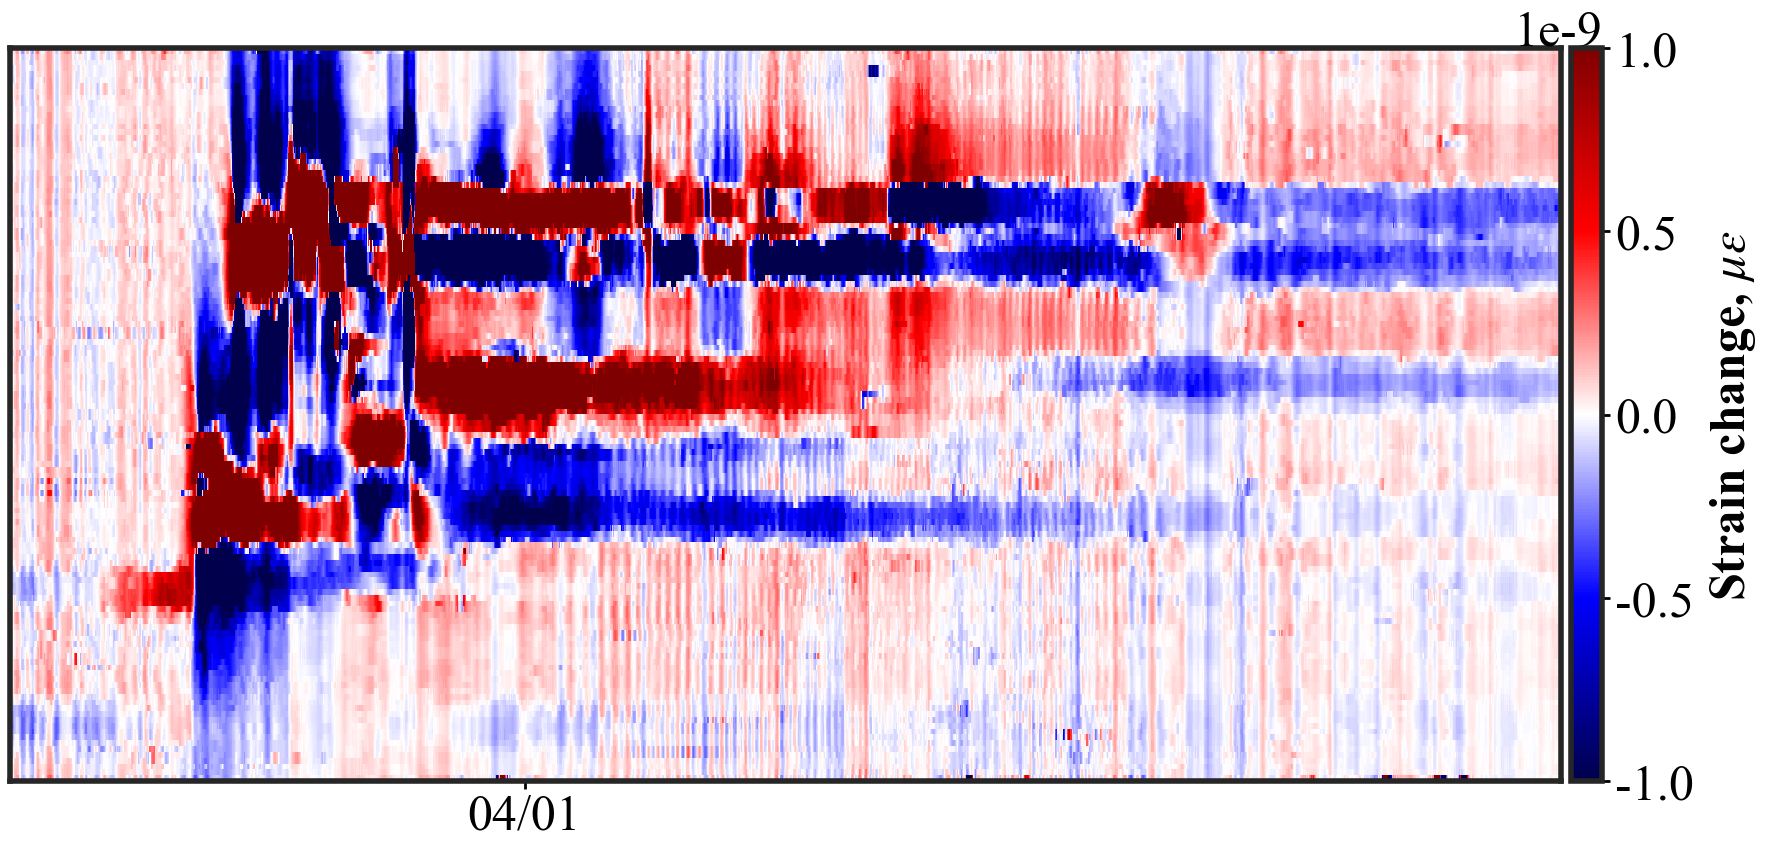

In [21]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
# 画瀑布图（对接你的 Data2D_XT）
# cmap = plt.get_cmap('jet').copy()
# cmap.set_bad('white')  # NaN 分隔带显示白色
DASdata = Data2D_XT.Data2D()
DASdata.data = data_clean                 # (N_ch, M_t)
DASdata.taxis = t_sub                   # 仍然是“相对秒”
DASdata.daxis = md_sub                  # 现在是 MD（ft），含 NaN 分隔也 OK
DASdata.start_time = start_time       # 搭配 use_timestamp=True 才能显示绝对时间刻度

#adjust the size

fig, ax = plt.subplots(figsize=(16, 8), layout='constrained')  # 宽 12 英寸，高 6 英寸

# DASdata.plot_waterfall(timescale='second',use_timestamp=True,timefmt = '%m/%d\n%H:%M:%S.{ms}')
DASdata.plot_waterfall(timescale='second', use_timestamp=True, cmap=plt.get_cmap('seismic'), xtickN=5, interpolation='nearest')#interpolation='nearest' 或 'bilinear' #antialiased

ax = plt.gca()
im = ax.images[-1]
im.set_norm(TwoSlopeNorm(vmin=-1e-9, vcenter=0, vmax=1e-9))  # 以 0 为中心
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%",pad=0.1)  # 调整 3.5% 为你想要的宽度
cbar = fig.colorbar(im,cax=cax, ax=ax) # pad 调整颜色条与图的距离pad 数值越大越远（相对于轴宽度的比例）

cbar.set_label(r'Strain change, $\mu\varepsilon$', rotation=90, labelpad=10)
# plt.clim(-1e-8, 1e-8)
cbar.set_ticks([-1e-9, -0.5e-9, 0, 0.5e-9, 1e-9])                 # 或 cbar.ax.yaxis.set_major_locator(FixedLocator([...]))
# cbar.set_ticklabels([r'$-1$', r'$-0.5$', r'$0$', r'$0.5$', r'$1$'])


# ax.set_ylabel("Measured Depth (ft)", fontweight='bold')
# ax.set_xlabel("Date",     fontweight='bold')

#S6
# # X 轴

# ax.set_xticks([
#     datetime.datetime(2019,3,28,0,0,0) + timedelta(days=i *2 ) for i in range(5)
# ])                     # 位置（数据坐标）

ticks = [
    datetime.datetime(2019,4,1,20,0,0) + timedelta(days=i*2) for i in range(1)
]

# ticks = [
#     datetime.datetime(2019,4,5,21,0,0),       # 自定义时间点
#     *[
#         datetime.datetime(2019,3,30,0,0,0) + timedelta(days=i*2)
#         for i in range(6)
#     ]
# ]

ax.set_xticks(ticks)

# 只显示年月日
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%d/%y'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))


# ax.set_xticklabels(['2019-04-01','2019-04-01'])     # 文本（与上面位置一一对应）

# ax.set_yticks([17400, 17600, 17800,18000])                     # 位置（数据坐标）
# ax.set_yticklabels(['17400', '17600', '17800', '18000'])     # 文本（与上面位置一一对应）


# S22
# ax.set_xticks([start_time + timedelta(minutes=150), datetime.datetime(2019,4,1,17,6,27)+ timedelta(minutes=40)])                     # 位置（数据坐标）
# ax.set_xticklabels(['2019-04-07','2019-04-07'])     # 文本（与上面位置一一对应）
# ax.set_xticklabels(['','']) 
# ax.set_yticks([13600, 13800, 14000, 14200, 14400])                     # 位置（数据坐标）
# ax.set_yticklabels(['13600', '13800', '14000', '14200', '14400'])     # 文本（与上面位置一一对应/）




# 均匀间隔
# ax.xaxis.set_major_locator(MultipleLocator(3600))     # 每 3600 秒一个大刻度
ax.yaxis.set_major_locator(MultipleLocator(2000))     # 每 2000 ft 一个大刻度

# # 控制刻度文本格式（自定义函数）
# ax.xaxis.set_major_formatter(FuncFormatter(lambda v, pos: f'{v/3600:.1f} h'))
# ax.yaxis.set_major_formatter(FuncFormatter(lambda v, pos: f'{v:.0f}'))






# plt.tight_layout()
plt.savefig('waterfall_HFTS2_B2H(B4H)_S6.png', dpi=600, bbox_inches='tight', pad_inches=0.05)
# plt.savefig('waterfall_HFTS2_S22.png')



# S6

## data pre_processing and axes calibration 

In [22]:
# import packages
import h5py # read h5

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from matplotlib import rc
from cycler import cycler
from depth_and_time_cut import subset_dstrain_by_time_ranges, subset_dstrain_by_md_ranges
from matplotlib.colors import TwoSlopeNorm
from matplotlib.ticker import MultipleLocator, FuncFormatter, MaxNLocator, ScalarFormatter, FixedLocator, LogFormatter

import numpy as np
import pandas as pd


# download and install Dr. Jin's python package, click the url below for more details
# !git clone https://github.com/jinwar/jin_pylib

from jin_pylib import gjsignal
from jin_pylib import Data2D_XT


In [23]:
# Read h5 files
# f1 = h5py.File('C:/Users/fengxiang.mao/Desktop/Devon data/HFTS-1_Devon/20220707/Evo 3 (refrac)/Neubrex_DSS_strain/Zgabay A14H - refrac - strain change.h5','r')
# merged_data = h5py.File('C:/Users/fengxiang.mao/Desktop/HFTS2_dataset/stage6/merged_stage6_preserve_time.h5','r')
merged_data = h5py.File('C:/Users/fengxiang.mao/Desktop/HFTS2_dataset/Anadarko_B2H_(B4H)_CWC/Input/0.1 Hz Diff/S6/merged_B1H_(B4H)_S6.h5','r')

print(list(merged_data.keys()))

['Acquisition']


In [24]:
# Assign variables
pchange = (merged_data['Acquisition']['Raw[0]']['RawData'])
# depth = (f1['depth'])
time_relative = (merged_data['Acquisition']['Raw[0]']['RawDataTime'])

# use panda package
print(pd.DataFrame(pchange))
print(pd.DataFrame(time_relative))

        0        1       2       3       4       5       6        7     \
0     -51391   -36957     490   53855  -12971   -3779  -41155   -83708   
1       6829     6184  -34397  -83268  -24033    2353  -13835    50250   
2     333375   382830  213535  199768  202988  136851  371026   442562   
3     513177   538285  403002  248959 -148475 -155910  562628  1357513   
4     973541  1105407  918889  388229 -465906 -405476  636013  1895493   
...      ...      ...     ...     ...     ...     ...     ...      ...   
6095    5395    -8648  -19306   -2406   38398   37001   64182    92390   
6096    4888    54706   24511   -7156    5468    2192  -23180     1547   
6097   39920    12300    8744    1131   -7440    3803  -26998   101794   
6098 -123842   -17867     872  -12743    8542   -1508  -19671   -24073   
6099    7942   -10174  -11244  -10111   24633   15737  -69333   -30066   

         8       9     ...    2180    2181    2182    2183    2184    2185  \
0       -5652   -3641  ...  -1168

In [25]:
# start = pd.Timestamp("2019-04-07 03:31:27")
# end   = pd.Timestamp("2019-04-07 09:00:27")
# realtime = pd.to_datetime(time_relative, unit='us')
# mask = (realtime >= start) & (realtime <= end)
# t_cut = realtime[mask]

In [27]:
# convert the strain data to numpy array
pchange = np.array(pchange)
print(pchange.shape)


# convert optical phase change into strain change
def phase_to_strain(arr):
    probe_wave_length = 1550e-9
    refractive_index = 1.4682
    scalar_multi_factor = 0.78
    gauge_length = 7.1467
    stored_value = 104300.4       #stored data unit rad/10430

    return probe_wave_length/(4*np.pi*refractive_index*scalar_multi_factor*gauge_length)*(arr/stored_value)

dstrain = phase_to_strain(pchange)

print(dstrain)

(6100, 2190)
[[-7.42570265e-09 -5.34007302e-09  7.08021696e-11 ...  1.21678586e-09
   2.00268994e-10 -1.21808631e-09]
 [ 9.86751053e-10  8.93552279e-10 -4.97016781e-09 ...  1.65155453e-08
   1.99451157e-08  1.92321812e-10]
 [ 4.81707618e-08  5.53167236e-08  3.08545740e-08 ... -3.57949760e-08
  -1.23938475e-08  2.14414978e-09]
 ...
 [ 5.76820941e-09  1.77727895e-09  1.26345749e-09 ...  2.54598822e-10
  -3.70772178e-10  3.69760718e-10]
 [-1.78944536e-08 -2.58167829e-09  1.25998963e-10 ... -1.33816100e-09
   7.05232957e-09  2.78498167e-09]
 [ 1.14757312e-09 -1.47008423e-09 -1.62469305e-09 ... -1.01286116e-08
   1.70387588e-09 -2.60031805e-09]]


In [28]:
# Parameters
sp_resolution = 1.0209523439407349    # Spatial resolution, m
time_resolution = 10     # Time resolution, s
optical_dis_top = 327.20279999999997  # Optical distance to top, m
optical_dis_end = 6198.7121136000005  # Optical distance to bottom, m
physical_dis_top = -4.440892098500626E-15      # Physical distance to top, m
physical_dis_end = 5840.0656312500005  # Physical distance to bottom, m
kelly_bushing = 7.9248   # Kelly bushing height, m


# Convert meters to feet
def meters_to_feet(meters):
    return meters * 3.28084

sp_resolution_ft = meters_to_feet(sp_resolution)
optical_dis_top_ft = meters_to_feet(optical_dis_top)
optical_dis_end_ft = meters_to_feet(optical_dis_end)
physical_dis_top_ft = meters_to_feet(physical_dis_top)
physical_dis_end_ft = meters_to_feet(physical_dis_end)
kelly_bushing_ft = meters_to_feet(kelly_bushing)


# Compute MD (measured depth) for a range of channel counts in a vectorized way
min_channels = 0
max_channels = 6099
channels = np.arange(min_channels, max_channels + 1)
fiber_MD = channels * sp_resolution_ft 
MD = (fiber_MD - optical_dis_top_ft) * (physical_dis_end_ft - physical_dis_top_ft) / (optical_dis_end_ft - optical_dis_top_ft)  + kelly_bushing_ft

print(MD)
print(MD.shape)

[-1041.75112088 -1038.4194776  -1035.08783432 ... 19271.27796929
 19274.60961257 19277.94125585]
(6100,)


In [41]:

ranges = [(17400, 18100)]
# ranges = [(13500, 14500)]

# 已有：dstrain.shape == (N_ch, N_t)、MD.shape == (N_ch,)
# ranges 用 MD（ft）指定

# A) 推荐：严格按 MD 边界插值（边界精确）
# data_sub, md_sub, meta = subset_dstrain_by_md_ranges(
#     dstrain, MD, ranges,
#     method="interp",
#     keep_gaps=True,   # 区间之间空白隔开，瀑布图更清晰
#     gap_rows=2,
# )

# B) 若追求速度且能接受边界落到最近 channel：
data_sub, md_sub, meta = subset_dstrain_by_md_ranges(dstrain, MD, ranges, method="nearest_channel", keep_gaps=True)


In [42]:
print(data_sub.shape)
print(md_sub.shape)
print(data_sub)


(210, 2190)
(210,)
[[ 2.16741335e-11 -1.52874889e-10 -1.52152417e-10 ... -9.10313609e-12
  -4.46487151e-11 -1.93622260e-11]
 [-8.84304648e-11 -1.93044283e-10 -1.36402547e-10 ... -8.91529360e-11
  -3.01992927e-11  2.16741335e-11]
 [ 3.22222119e-11 -1.02590899e-10 -8.62630515e-11 ...  1.21519642e-10
  -6.03985855e-11 -1.24843009e-10]
 ...
 [-5.98206086e-11 -2.16307853e-10 -2.29745816e-10 ... -6.24215046e-11
  -4.40707382e-11 -2.19631220e-11]
 [ 3.55455790e-11 -7.29695829e-11 -5.36073570e-11 ... -1.22820090e-11
  -5.93871259e-11 -6.11210566e-11]
 [ 2.48530065e-11 -1.05047301e-10 -1.17762792e-10 ... -8.25062017e-11
  -6.22770104e-11 -2.02291913e-11]]


In [43]:
t_intrvl = 10  # time interval in seconds
t_axis =  t_intrvl * np.arange(dstrain.shape[-1])          # array([1, 146, 291, ...])
t_axis = t_axis.tolist() 
print(t_axis)
print(type(t_axis))
start_time = datetime.datetime(2019,4,1,18,00,28)

# start_time = datetime.datetime(2019,4,7,3,31,27)
# start_time = datetime.datetime(2019,4,7,1,51,27)
# print(start_time)


[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090, 1100, 1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190, 1200, 1210, 1220, 1230, 1240, 1250, 1260, 1270, 1280, 1290, 1300, 1310, 1320, 1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410, 1420, 1430, 1440, 1450, 1460, 1470, 1480, 1490, 1500, 1510, 1520, 1530, 1540, 1550, 1560, 1570, 1580, 1590, 1600, 1610, 1620, 1630, 1640, 1650, 1660, 1670, 1680, 1690, 1700, 1710, 1720, 1730, 1740, 1750, 1760, 1770, 1780, 1790, 1800, 1810, 1820, 1830, 1840, 

In [44]:

# 例1：用“相对秒”指定两段
# ranges_t = [(0, 3600), (7200, 7800)]   # [0, 1h] 和 [2h, 2h10m]

# 例2：用“绝对时间”指定（需要 start_time）
from datetime import timedelta
ranges_t = [(start_time + timedelta(minutes=0), datetime.datetime(2019,4,2,00,00,43))]
# ranges_t = [(start_time + timedelta(minutes=0), datetime.datetime(2019,4,7,10,6,27))]    #这个时间是文件开始的时间，里面还有29个intervals

# ranges_t = [(start_time + timedelta(minutes=5), start_time + timedelta(minutes=30)),
#             (start_time + timedelta(hours=2),  start_time + timedelta(hours=2, minutes=10))]

# A) 边界精确（推荐）
# data_tsub, t_sub, tmeta = subset_dstrain_by_time_ranges(
#     data_sub, t_axis, ranges_t,
#     start_time=start_time,
#     method="interp",
#     keep_gaps=True,
#     gap_cols=2,
#     include_endpoints=True
# )

# B) 速度优先（不插值）
data_tsub, t_sub, tmeta = subset_dstrain_by_time_ranges(
    data_sub, t_axis, ranges_t, start_time=start_time, method="nearest", keep_gaps=True
)


In [45]:
import numpy as np
import pandas as pd

# t：把你的 t_axis 统一成“相对秒”的 ndarray
t = np.asarray(t_axis, dtype=float)
dt = float(np.median(np.diff(t)))  # 估计采样间隔，应≈10

# 把你传给函数的 ranges_t（若是绝对时间）也转为“相对秒”
def to_rel_s(r, start_time):
    lo, hi = r
    lo = (pd.to_datetime(lo) - pd.to_datetime(start_time)).total_seconds()
    hi = (pd.to_datetime(hi) - pd.to_datetime(start_time)).total_seconds()
    return lo, hi

# 如果你的 ranges_t 就是相对秒，这步就不用
lo, hi = to_rel_s(ranges_t[0], start_time)

print("t[0], t[-1], dt =", t[0], t[-1], dt)
print("你给的区间(秒)   =", lo, hi)
print("左侧被裁掉列数 =", np.sum(t < lo))
print("右侧被裁掉列数 =", np.sum(t > hi))


t[0], t[-1], dt = 0.0 21890.0 10.0
你给的区间(秒)   = 0.0 21615.0
左侧被裁掉列数 = 0
右侧被裁掉列数 = 28


In [46]:
print(data_tsub.shape)

(210, 2162)


In [47]:
import numpy as np
from numpy.lib.stride_tricks import sliding_window_view

def _rolling_median_time(x, win):
    """沿时间轴滚动中位数，忽略 NaN；边界用 edge 填充。x: (n_ch, n_t)"""
    if win < 3 or win % 2 == 0:
        raise ValueError("win 应是 >=3 的奇数")
    pad = win // 2
    xp = np.pad(x, ((0,0),(pad,pad)), mode='edge')
    # 关键修正：window_shape
    w = sliding_window_view(xp, window_shape=win, axis=1)  # (n_ch, n_t, win)
    med = np.nanmedian(w, axis=-1)
    return med

def _rolling_mean_time_nanaware(x, win):
    """沿时间轴移动平均（对 NaN 做权重归一），x: (n_ch, n_t)"""
    if win < 3 or win % 2 == 0:
        raise ValueError("win 应是 >=3 的奇数")
    kernel = np.ones(win, dtype=float)
    pad = win // 2
    x0 = np.pad(np.where(np.isfinite(x), x, 0.0), ((0,0),(pad,pad)), mode='edge')
    w0 = np.pad(np.where(np.isfinite(x), 1.0, 0.0), ((0,0),(pad,pad)), mode='edge')
    # 逐通道一维卷积
    val = np.apply_along_axis(lambda m: np.convolve(m, kernel, mode='valid'), 1, x0)
    cnt = np.apply_along_axis(lambda m: np.convolve(m, kernel, mode='valid'), 1, w0)
    out = val / np.maximum(cnt, 1e-12)
    # 原位是 NaN 的位置保持 NaN（避免填补 gap）
    out[~np.isfinite(x)] = np.nan
    return out

def _median_depth_nanaware(x, win=3):
    """沿深度（通道轴=0）做极轻的中值滤波，去椒盐点；对 NaN 友好。"""
    if win < 3 or win % 2 == 0:
        raise ValueError("win 应是 >=3 的奇数")
    pad = win // 2
    xp = np.pad(x, ((pad,pad),(0,0)), mode='edge')
    # 关键修正：window_shape，且不要 moveaxis
    w = sliding_window_view(xp, window_shape=win, axis=0)  # (n_ch, n_t, win)
    med = np.nanmedian(w, axis=-1)                         # 沿窗口轴取中位
    med[~np.isfinite(x)] = np.nan
    return med

def despike_mad_time(x, win=5, k=6.0):
    """
    MAD 去尖峰（沿时间轴）。win:奇数窗口；k: 阈值倍数（常用 5~8）。
    只替换超过 k*MAD 的离群点为局部中位数。
    """
    med = _rolling_median_time(x, win)
    dev = x - med
    mad = _rolling_median_time(np.abs(dev), win)
    sigma = 1.4826 * mad
    mask = np.isfinite(x) & np.isfinite(sigma) & (np.abs(dev) > k * sigma)
    out = x.copy()
    out[mask] = med[mask]
    return out

def denoise_pipeline(data_mu_eps,
                     t_win_despike=5,    # 5*10s=50s 局部去尖峰
                     mad_k=6.0,
                     t_win_smooth=7,     # 7*10s=70s 轻平滑
                     use_depth_median=True,
                     depth_win=3):
    """
    data_mu_eps: (n_ch, n_t) 单位 μɛ，含 NaN 间隔（来自 keep_gaps）。
    返回：去噪后的 (n_ch, n_t)
    """
    # 记录哪些列/行是 gap（全 NaN），用于保护不跨 gap 平滑
    col_gap = np.all(~np.isfinite(data_mu_eps), axis=0)
    row_gap = np.all(~np.isfinite(data_mu_eps), axis=1)

    y = data_mu_eps.copy()
    # 1) MAD 去尖峰（时间轴）
    y = despike_mad_time(y, win=t_win_despike, k=mad_k)
    # 2) 移动平均轻平滑（时间轴）
    y = _rolling_mean_time_nanaware(y, win=t_win_smooth)
    # 3) 可选：沿深度 3 点中值（极轻）
    if use_depth_median:
        y = _median_depth_nanaware(y, win=depth_win)
    # 恢复 gap：保持 gap 位置仍为 NaN
    y[:, col_gap] = np.nan
    y[row_gap, :] = np.nan
    return y


In [48]:
# 2) 去噪流水线
data_clean = denoise_pipeline(
    data_tsub,
    t_win_despike=5,   # 50 s 局部中位去尖峰
    mad_k=6.0,
    t_win_smooth=7,    # 70 s 轻平滑；若你想更锐利，用 5
    use_depth_median=True,
    depth_win=3
)

## Waterfall plot

In [49]:
# Figure format
rc = {'axes.facecolor':'white',
      'figure.figsize': (12, 6),
      'savefig.dpi': 600,
#       'axes.grid' : False,
      'axes.edgecolor' : '0.15',
      'font.family':'Times New Roman',
      'font.serif': ['Times New Roman', 'Times', 'STIXGeneral'],  # 备选

      # —— 数学字体（$...$ 内）——
      'mathtext.fontset': 'stix',     # 关键：让 μ、ε 等用 STIX（Times 风格）
      'axes.unicode_minus': False,    # 让负号显示为正常的连字符
      
      'axes.labelsize': 36,         # X、Y 轴标题字体
      'axes.labelweight': 'bold',   # X、Y 轴标题加粗
      'xtick.labelsize': 36,        # X轴刻度文字
      'ytick.labelsize': 36,        # Y轴刻度文字
      'legend.fontsize': 36,       # 图例字体

      # 线宽与颜色顺序
      'lines.linewidth': 2.25,      # 所有线条默认 2.25 pt
      'axes.prop_cycle': cycler('color', list(('k', 'r', 'b', 'g', 'm', 'c', 'y'))),

      # 刻度朝外 & 粗细
      'xtick.direction': 'out',
      'ytick.direction': 'out',
      'xtick.major.size': 6,
      'ytick.major.size': 6,
      'xtick.major.width': 2.0,
      'ytick.major.width': 2.0,

      # 坐标轴（内框）线宽
      'axes.linewidth': 4.0,
      } 
# lack of font size
plt.rcParams.update(rc)

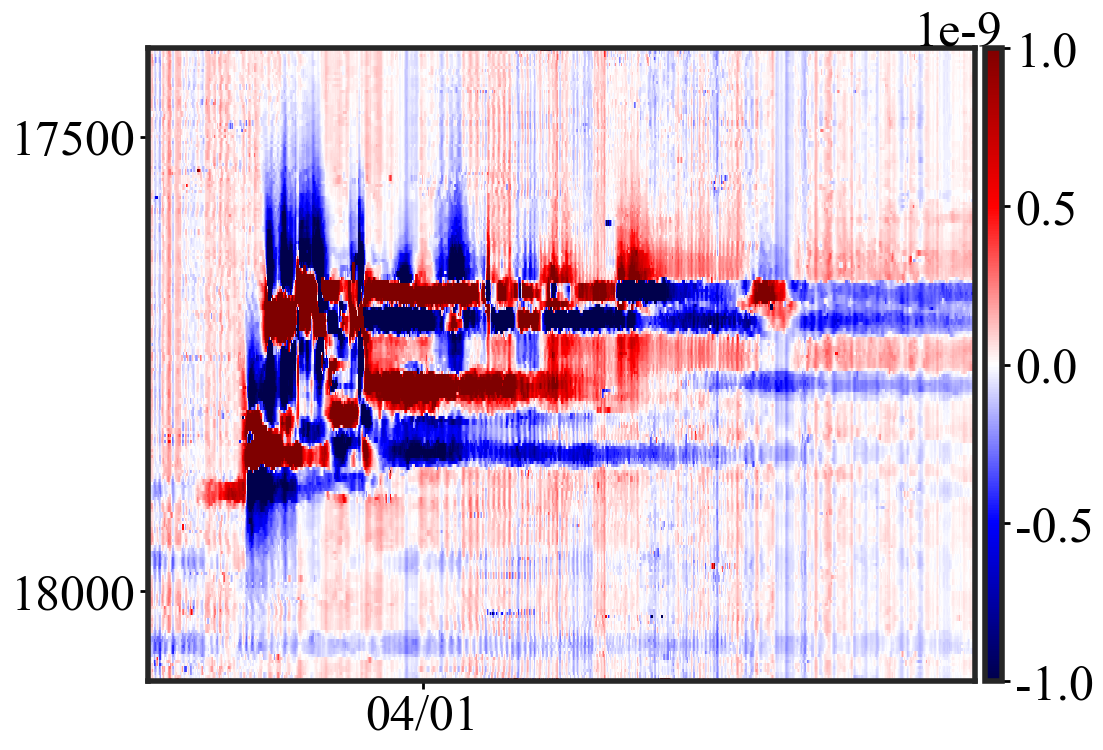

In [50]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
# 画瀑布图（对接你的 Data2D_XT）
# cmap = plt.get_cmap('jet').copy()
# cmap.set_bad('white')  # NaN 分隔带显示白色
DASdata = Data2D_XT.Data2D()
DASdata.data = data_clean                 # (N_ch, M_t)
DASdata.taxis = t_sub                   # 仍然是“相对秒”
DASdata.daxis = md_sub                  # 现在是 MD（ft），含 NaN 分隔也 OK
DASdata.start_time = start_time       # 搭配 use_timestamp=True 才能显示绝对时间刻度

#adjust the size

fig, ax = plt.subplots(figsize=(10, 7), layout='constrained')  # 宽 12 英寸，高 6 英寸

# DASdata.plot_waterfall(timescale='second',use_timestamp=True,timefmt = '%m/%d\n%H:%M:%S.{ms}')
DASdata.plot_waterfall(timescale='second', use_timestamp=True, cmap=plt.get_cmap('seismic'), xtickN=5, interpolation='nearest')#interpolation='nearest' 或 'bilinear' #antialiased

ax = plt.gca()
im = ax.images[-1]
im.set_norm(TwoSlopeNorm(vmin=-1e-9, vcenter=0, vmax=1e-9))  # 以 0 为中心
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%",pad=0.1)  # 调整 3.5% 为你想要的宽度
cbar = fig.colorbar(im,cax=cax, ax=ax) # pad 调整颜色条与图的距离pad 数值越大越远（相对于轴宽度的比例）

# cbar.set_label(r'Strain change, $\mu\varepsilon$', rotation=90, labelpad=10)
# plt.clim(-1e-8, 1e-8)
cbar.set_ticks([-1e-9, -0.5e-9, 0, 0.5e-9, 1e-9])                 # 或 cbar.ax.yaxis.set_major_locator(FixedLocator([...]))
# cbar.set_ticklabels([r'$-1$', r'$-0.5$', r'$0$', r'$0.5$', r'$1$'])


# ax.set_ylabel("Measured Depth (ft)", fontweight='bold')
# ax.set_xlabel("Date",     fontweight='bold')

#S6
# # X 轴
# ax.set_xticks([datetime.datetime(2019,4,1,19,20,00),datetime.datetime(2019,4,1,22,45,00)])                     # 位置（数据坐标）
# ax.set_xticklabels(['2019-04-01','2019-04-01'])     # 文本（与上面位置一一对应）

# ax.set_yticks([17400, 17600, 17800,18000])                     # 位置（数据坐标）
# ax.set_yticklabels(['17400', '17600', '17800', '18000'])     # 文本（与上面位置一一对应）

ticks = [
    datetime.datetime(2019,4,1,20,0,0) + timedelta(days=i*2) for i in range(1)
]
ax.set_xticks(ticks)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))

# S22
# ax.set_xticks([start_time + timedelta(minutes=150), datetime.datetime(2019,4,1,17,6,27)+ timedelta(minutes=40)])                     # 位置（数据坐标）
# ax.set_xticklabels(['2019-04-07','2019-04-07'])     # 文本（与上面位置一一对应）
# ax.set_xticklabels(['','']) 
# ax.set_yticks([13600, 13800, 14000, 14200, 14400])                     # 位置（数据坐标）
# ax.set_yticklabels(['13600', '13800', '14000', '14200', '14400'])     # 文本（与上面位置一一对应/）




# 均匀间隔
# ax.xaxis.set_major_locator(MultipleLocator(3600))     # 每 3600 秒一个大刻度
# ax.yaxis.set_major_locator(MultipleLocator(5000))     # 每 2000 ft 一个大刻度

# # 控制刻度文本格式（自定义函数）
# ax.xaxis.set_major_formatter(FuncFormatter(lambda v, pos: f'{v/3600:.1f} h'))
# ax.yaxis.set_major_formatter(FuncFormatter(lambda v, pos: f'{v:.0f}'))

ax.yaxis.set_major_locator(MultipleLocator(500))     # 每 2000 ft 一个大刻度




# plt.tight_layout()
plt.savefig('waterfall_HFTS2_B2H(B4H)_S6.png', dpi=600, bbox_inches='tight', pad_inches=0.05)
# plt.savefig('waterfall_HFTS2_S22.png')



# S22

## data pre_processing and axes calibration 

In [53]:
# import packages
import h5py # read h5

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from matplotlib import rc
from cycler import cycler
from depth_and_time_cut import subset_dstrain_by_time_ranges, subset_dstrain_by_md_ranges
from matplotlib.colors import TwoSlopeNorm
from matplotlib.ticker import MultipleLocator, FuncFormatter, MaxNLocator, ScalarFormatter, FixedLocator, LogFormatter

import numpy as np
import pandas as pd


# download and install Dr. Jin's python package, click the url below for more details
# !git clone https://github.com/jinwar/jin_pylib

from jin_pylib import gjsignal
from jin_pylib import Data2D_XT


In [54]:
# Read h5 files
# f1 = h5py.File('C:/Users/fengxiang.mao/Desktop/Devon data/HFTS-1_Devon/20220707/Evo 3 (refrac)/Neubrex_DSS_strain/Zgabay A14H - refrac - strain change.h5','r')
# merged_data = h5py.File('C:/Users/fengxiang.mao/Desktop/HFTS2_dataset/stage6/merged_stage6_preserve_time.h5','r')
merged_data = h5py.File('C:/Users/fengxiang.mao/Desktop/HFTS2_dataset/Anadarko_B2H_(B4H)_CWC/Input/0.1 Hz Diff/S22/merged_B1H_(B4H)_S22.h5','r')
print(list(merged_data.keys()))

['Acquisition']


In [55]:
# Assign variables
pchange = (merged_data['Acquisition']['Raw[0]']['RawData'])
# depth = (f1['depth'])
time_relative = (merged_data['Acquisition']['Raw[0]']['RawDataTime'])

# use panda package
print(pd.DataFrame(pchange))
print(pd.DataFrame(time_relative))

        0       1       2       3       4       5       6       7       8     \
0     -26260   31021   54003   42603   26808  -16689 -135258  -86859   24807   
1       4666  -39340    1920   38835   15958   -2537   -1376  -14192   13990   
2     -81309 -160756  213765  137093 -137508  -43468   27075  109928  175885   
3     178863  268126    3204  -32634  -32729   17449  -25662 -543046 -360602   
4    -123815 -270587  104659  147915 -121968  -40672  -80178  203154  161428   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
6095   62992    7565  143663 -163722 -134161 -224840  134381  141285 -113224   
6096   -2714    -187    3951   -3540   -3978   37821   26055   99265   75867   
6097    1310    2540    1039    1149     570    -336    -622   -1621   -1407   
6098 -152943  -95785   18523   66020  131418  192504   58989   13732 -131427   
6099  101060   94144  141904  125468  -50243 -231835    2918  169942  109094   

        9     ...    1940    1941    19

In [56]:
# start = pd.Timestamp("2019-04-07 03:31:27")
# end   = pd.Timestamp("2019-04-07 09:00:27")
# realtime = pd.to_datetime(time_relative, unit='us')
# mask = (realtime >= start) & (realtime <= end)
# t_cut = realtime[mask]

In [57]:
# convert the strain data to numpy array
pchange = np.array(pchange)
print(pchange.shape)


# convert optical phase change into strain change
def phase_to_strain(arr):
    probe_wave_length = 1550e-9
    refractive_index = 1.4682
    scalar_multi_factor = 0.78
    gauge_length = 7.1467
    stored_value = 104300.4       #stored data unit rad/10430

    return probe_wave_length/(4*np.pi*refractive_index*scalar_multi_factor*gauge_length)*(arr/stored_value)

dstrain = phase_to_strain(pchange)

print(dstrain)

(6100, 1950)
[[-3.79441831e-09  4.48235531e-09  7.80312156e-09 ... -3.34937610e-10
  -2.21220656e-10  1.68046782e-10]
 [ 6.74210047e-10 -5.68440276e-09  2.77428909e-10 ...  1.95934167e-10
   1.77930187e-09  1.64116539e-09]
 [-1.17486808e-08 -2.32283134e-08  3.08878077e-08 ...  5.54554381e-08
   3.98802612e-08  1.42935131e-08]
 ...
 [ 1.89287433e-10  3.67015328e-10  1.50129498e-10 ...  1.97972981e-08
   2.45919054e-08  1.35655512e-08]
 [-2.20993800e-08 -1.38403792e-08  2.67646650e-09 ... -1.39480274e-09
   8.19195551e-09  1.02004252e-08]
 [ 1.46025862e-08  1.36032642e-08  2.05043083e-08 ... -2.26855931e-10
  -1.62267013e-10 -2.99970008e-10]]


In [58]:
# Parameters
sp_resolution = 1.0209523439407349    # Spatial resolution, m
time_resolution = 10     # Time resolution, s
optical_dis_top = 327.20279999999997  # Optical distance to top, m
optical_dis_end = 6198.7121136000005  # Optical distance to bottom, m
physical_dis_top = -4.440892098500626E-15      # Physical distance to top, m
physical_dis_end = 5840.0656312500005  # Physical distance to bottom, m
kelly_bushing = 7.9248   # Kelly bushing height, m


# Convert meters to feet
def meters_to_feet(meters):
    return meters * 3.28084

sp_resolution_ft = meters_to_feet(sp_resolution)
optical_dis_top_ft = meters_to_feet(optical_dis_top)
optical_dis_end_ft = meters_to_feet(optical_dis_end)
physical_dis_top_ft = meters_to_feet(physical_dis_top)
physical_dis_end_ft = meters_to_feet(physical_dis_end)
kelly_bushing_ft = meters_to_feet(kelly_bushing)


# Compute MD (measured depth) for a range of channel counts in a vectorized way
min_channels = 0
max_channels = 6099
channels = np.arange(min_channels, max_channels + 1)
fiber_MD = channels * sp_resolution_ft 
MD = (fiber_MD - optical_dis_top_ft) * (physical_dis_end_ft - physical_dis_top_ft) / (optical_dis_end_ft - optical_dis_top_ft)  + kelly_bushing_ft

print(MD)
print(MD.shape)

[-1041.75112088 -1038.4194776  -1035.08783432 ... 19271.27796929
 19274.60961257 19277.94125585]
(6100,)


In [59]:

# ranges = [(17350, 18180)]
ranges = [(13600, 14500)]

# 已有：dstrain.shape == (N_ch, N_t)、MD.shape == (N_ch,)
# ranges 用 MD（ft）指定

# A) 推荐：严格按 MD 边界插值（边界精确）
# data_sub, md_sub, meta = subset_dstrain_by_md_ranges(
#     dstrain, MD, ranges,
#     method="interp",
#     keep_gaps=True,   # 区间之间空白隔开，瀑布图更清晰
#     gap_rows=2,
# )

# B) 若追求速度且能接受边界落到最近 channel：
data_sub, md_sub, meta = subset_dstrain_by_md_ranges(dstrain, MD, ranges, method="nearest_channel", keep_gaps=True)


In [60]:
print(data_sub.shape)
print(md_sub.shape)
print(data_sub)


(270, 1950)
(270,)
[[ 4.68161284e-11  2.16741335e-12 -6.19880219e-11 ... -3.19332234e-11
  -8.77079937e-11 -1.11549541e-10]
 [-2.88988447e-13 -4.92725303e-11 -1.35824570e-11 ... -8.38066497e-12
  -7.36920540e-11 -9.13203493e-11]
 [ 1.60966565e-10  1.07503702e-10  7.52814905e-11 ... -4.19033248e-11
  -8.62630515e-11 -1.16028862e-10]
 ...
 [-9.24763031e-12 -9.86895547e-11 -8.94419244e-11 ... -4.17588306e-11
  -1.20219194e-10 -1.40737374e-10]
 [ 3.77129924e-11 -1.48829050e-11 -3.03437870e-12 ... -6.57448717e-11
  -1.20941665e-10 -1.27154917e-10]
 [-1.22531102e-10 -2.31046264e-10 -2.04459326e-10 ... -9.01643955e-11
  -1.38569960e-10 -1.32501203e-10]]


In [61]:
t_intrvl = 10  # time interval in seconds
t_axis =  t_intrvl * np.arange(dstrain.shape[-1])          # array([1, 146, 291, ...])
t_axis = t_axis.tolist() 
print(t_axis)
print(type(t_axis))
# start_time = datetime.datetime(2019,4,1,18,00,47)

start_time = datetime.datetime(2019,4,7,3,41,27)
# start_time = datetime.datetime(2019,4,7,1,51,27)
# print(start_time)


[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090, 1100, 1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190, 1200, 1210, 1220, 1230, 1240, 1250, 1260, 1270, 1280, 1290, 1300, 1310, 1320, 1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410, 1420, 1430, 1440, 1450, 1460, 1470, 1480, 1490, 1500, 1510, 1520, 1530, 1540, 1550, 1560, 1570, 1580, 1590, 1600, 1610, 1620, 1630, 1640, 1650, 1660, 1670, 1680, 1690, 1700, 1710, 1720, 1730, 1740, 1750, 1760, 1770, 1780, 1790, 1800, 1810, 1820, 1830, 1840, 

In [62]:

# 例1：用“相对秒”指定两段
# ranges_t = [(0, 3600), (7200, 7800)]   # [0, 1h] 和 [2h, 2h10m]

# 例2：用“绝对时间”指定（需要 start_time）
from datetime import timedelta
# ranges_t = [(start_time + timedelta(minutes=0), datetime.datetime(2019,4,2,1,00,47))]
ranges_t = [(start_time + timedelta(minutes=0), datetime.datetime(2019,4,7,9,1,53))]    #这个时间是文件开始的时间，里面还有29个intervals

# ranges_t = [(start_time + timedelta(minutes=5), start_time + timedelta(minutes=30)),
#             (start_time + timedelta(hours=2),  start_time + timedelta(hours=2, minutes=10))]

# A) 边界精确（推荐）
# data_tsub, t_sub, tmeta = subset_dstrain_by_time_ranges(
#     data_sub, t_axis, ranges_t,
#     start_time=start_time,
#     method="interp",
#     keep_gaps=True,
#     gap_cols=2,
#     include_endpoints=True
# )

# B) 速度优先（不插值）
data_tsub, t_sub, tmeta = subset_dstrain_by_time_ranges(
    data_sub, t_axis, ranges_t, start_time=start_time, method="nearest", keep_gaps=True
)


In [63]:
import numpy as np
import pandas as pd

# t：把你的 t_axis 统一成“相对秒”的 ndarray
t = np.asarray(t_axis, dtype=float)
dt = float(np.median(np.diff(t)))  # 估计采样间隔，应≈10

# 把你传给函数的 ranges_t（若是绝对时间）也转为“相对秒”
def to_rel_s(r, start_time):
    lo, hi = r
    lo = (pd.to_datetime(lo) - pd.to_datetime(start_time)).total_seconds()
    hi = (pd.to_datetime(hi) - pd.to_datetime(start_time)).total_seconds()
    return lo, hi

# 如果你的 ranges_t 就是相对秒，这步就不用
lo, hi = to_rel_s(ranges_t[0], start_time)

print("t[0], t[-1], dt =", t[0], t[-1], dt)
print("你给的区间(秒)   =", lo, hi)
print("左侧被裁掉列数 =", np.sum(t < lo))
print("右侧被裁掉列数 =", np.sum(t > hi))


t[0], t[-1], dt = 0.0 19490.0 10.0
你给的区间(秒)   = 0.0 19226.0
左侧被裁掉列数 = 0
右侧被裁掉列数 = 27


In [64]:
print(data_tsub.shape)

(270, 1923)


In [65]:
import numpy as np
from numpy.lib.stride_tricks import sliding_window_view

def _rolling_median_time(x, win):
    """沿时间轴滚动中位数，忽略 NaN；边界用 edge 填充。x: (n_ch, n_t)"""
    if win < 3 or win % 2 == 0:
        raise ValueError("win 应是 >=3 的奇数")
    pad = win // 2
    xp = np.pad(x, ((0,0),(pad,pad)), mode='edge')
    # 关键修正：window_shape
    w = sliding_window_view(xp, window_shape=win, axis=1)  # (n_ch, n_t, win)
    med = np.nanmedian(w, axis=-1)
    return med

def _rolling_mean_time_nanaware(x, win):
    """沿时间轴移动平均（对 NaN 做权重归一），x: (n_ch, n_t)"""
    if win < 3 or win % 2 == 0:
        raise ValueError("win 应是 >=3 的奇数")
    kernel = np.ones(win, dtype=float)
    pad = win // 2
    x0 = np.pad(np.where(np.isfinite(x), x, 0.0), ((0,0),(pad,pad)), mode='edge')
    w0 = np.pad(np.where(np.isfinite(x), 1.0, 0.0), ((0,0),(pad,pad)), mode='edge')
    # 逐通道一维卷积
    val = np.apply_along_axis(lambda m: np.convolve(m, kernel, mode='valid'), 1, x0)
    cnt = np.apply_along_axis(lambda m: np.convolve(m, kernel, mode='valid'), 1, w0)
    out = val / np.maximum(cnt, 1e-12)
    # 原位是 NaN 的位置保持 NaN（避免填补 gap）
    out[~np.isfinite(x)] = np.nan
    return out

def _median_depth_nanaware(x, win=3):
    """沿深度（通道轴=0）做极轻的中值滤波，去椒盐点；对 NaN 友好。"""
    if win < 3 or win % 2 == 0:
        raise ValueError("win 应是 >=3 的奇数")
    pad = win // 2
    xp = np.pad(x, ((pad,pad),(0,0)), mode='edge')
    # 关键修正：window_shape，且不要 moveaxis
    w = sliding_window_view(xp, window_shape=win, axis=0)  # (n_ch, n_t, win)
    med = np.nanmedian(w, axis=-1)                         # 沿窗口轴取中位
    med[~np.isfinite(x)] = np.nan
    return med

def despike_mad_time(x, win=5, k=6.0):
    """
    MAD 去尖峰（沿时间轴）。win:奇数窗口；k: 阈值倍数（常用 5~8）。
    只替换超过 k*MAD 的离群点为局部中位数。
    """
    med = _rolling_median_time(x, win)
    dev = x - med
    mad = _rolling_median_time(np.abs(dev), win)
    sigma = 1.4826 * mad
    mask = np.isfinite(x) & np.isfinite(sigma) & (np.abs(dev) > k * sigma)
    out = x.copy()
    out[mask] = med[mask]
    return out

def denoise_pipeline(data_mu_eps,
                     t_win_despike=5,    # 5*10s=50s 局部去尖峰
                     mad_k=6.0,
                     t_win_smooth=7,     # 7*10s=70s 轻平滑
                     use_depth_median=True,
                     depth_win=3):
    """
    data_mu_eps: (n_ch, n_t) 单位 μɛ，含 NaN 间隔（来自 keep_gaps）。
    返回：去噪后的 (n_ch, n_t)
    """
    # 记录哪些列/行是 gap（全 NaN），用于保护不跨 gap 平滑
    col_gap = np.all(~np.isfinite(data_mu_eps), axis=0)
    row_gap = np.all(~np.isfinite(data_mu_eps), axis=1)

    y = data_mu_eps.copy()
    # 1) MAD 去尖峰（时间轴）
    y = despike_mad_time(y, win=t_win_despike, k=mad_k)
    # 2) 移动平均轻平滑（时间轴）
    y = _rolling_mean_time_nanaware(y, win=t_win_smooth)
    # 3) 可选：沿深度 3 点中值（极轻）
    if use_depth_median:
        y = _median_depth_nanaware(y, win=depth_win)
    # 恢复 gap：保持 gap 位置仍为 NaN
    y[:, col_gap] = np.nan
    y[row_gap, :] = np.nan
    return y


In [66]:
# 2) 去噪流水线
data_clean = denoise_pipeline(
    data_tsub,
    t_win_despike=5,   # 50 s 局部中位去尖峰
    mad_k=6.0,
    t_win_smooth=7,    # 70 s 轻平滑；若你想更锐利，用 5
    use_depth_median=True,
    depth_win=3
)

## Waterfall plot

In [67]:
# Figure format
rc = {'axes.facecolor':'white',
      'figure.figsize': (12, 6),
      'savefig.dpi': 600,
#       'axes.grid' : False,
      'axes.edgecolor' : '0.15',
      'font.family':'Times New Roman',
      'font.serif': ['Times New Roman', 'Times', 'STIXGeneral'],  # 备选

      # —— 数学字体（$...$ 内）——
      'mathtext.fontset': 'stix',     # 关键：让 μ、ε 等用 STIX（Times 风格）
      'axes.unicode_minus': False,    # 让负号显示为正常的连字符
      
      'axes.labelsize': 36,         # X、Y 轴标题字体
      'axes.labelweight': 'bold',   # X、Y 轴标题加粗
      'xtick.labelsize': 36,        # X轴刻度文字
      'ytick.labelsize': 36,        # Y轴刻度文字
      'legend.fontsize': 36,       # 图例字体

      # 线宽与颜色顺序
      'lines.linewidth': 2.25,      # 所有线条默认 2.25 pt
      'axes.prop_cycle': cycler('color', list(('k', 'r', 'b', 'g', 'm', 'c', 'y'))),

      # 刻度朝外 & 粗细
      'xtick.direction': 'out',
      'ytick.direction': 'out',
      'xtick.major.size': 6,
      'ytick.major.size': 6,
      'xtick.major.width': 2.0,
      'ytick.major.width': 2.0,

      # 坐标轴（内框）线宽
      'axes.linewidth': 4,
      } 
# lack of font size
plt.rcParams.update(rc)

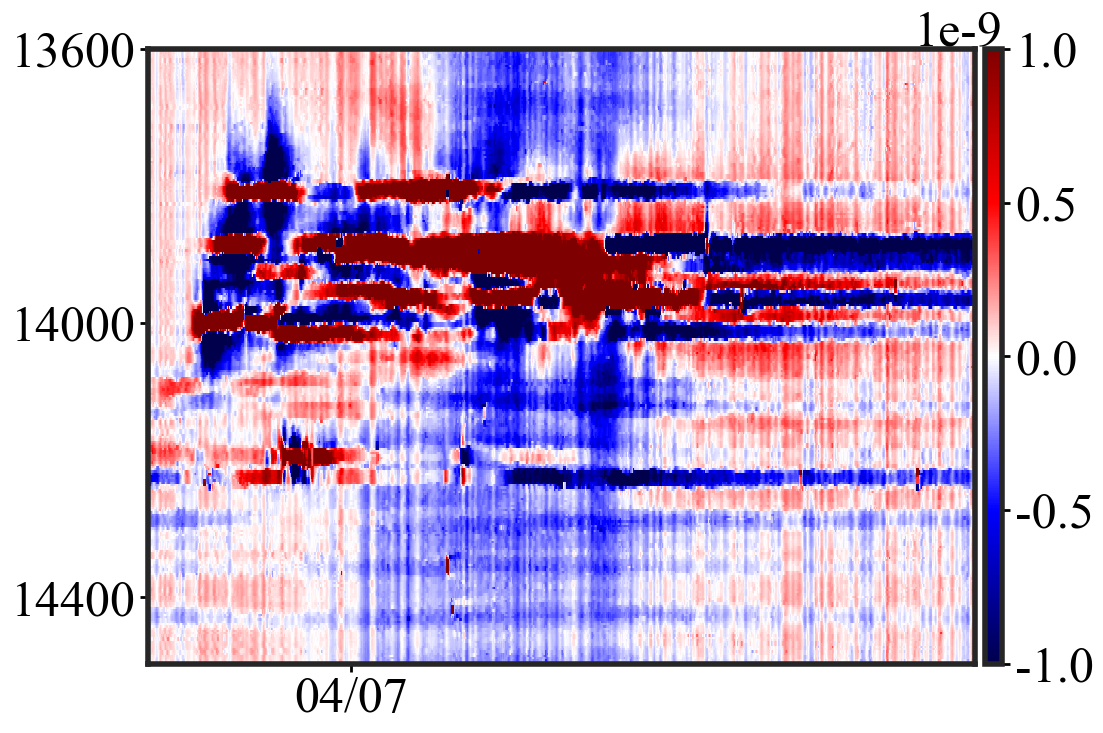

In [70]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
# 画瀑布图（对接你的 Data2D_XT）
# cmap = plt.get_cmap('jet').copy()
# cmap.set_bad('white')  # NaN 分隔带显示白色
DASdata = Data2D_XT.Data2D()
DASdata.data = data_clean                 # (N_ch, M_t)
DASdata.taxis = t_sub                   # 仍然是“相对秒”
DASdata.daxis = md_sub                  # 现在是 MD（ft），含 NaN 分隔也 OK
DASdata.start_time = start_time       # 搭配 use_timestamp=True 才能显示绝对时间刻度

#adjust the size

fig, ax = plt.subplots(figsize=(10, 7), layout='constrained')  # 宽 12 英寸，高 6 英寸

# DASdata.plot_waterfall(timescale='second',use_timestamp=True,timefmt = '%m/%d\n%H:%M:%S.{ms}')
DASdata.plot_waterfall(timescale='second', use_timestamp=True, cmap=plt.get_cmap('seismic'), xtickN=5, interpolation='nearest')#interpolation='nearest' 或 'bilinear' #antialiased

ax = plt.gca()
im = ax.images[-1]
im.set_norm(TwoSlopeNorm(vmin=-1e-9, vcenter=0, vmax=1e-9))  # 以 0 为中心
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%",pad=0.1)  # 调整 3.5% 为你想要的宽度
cbar = fig.colorbar(im,cax=cax, ax=ax) # pad 调整颜色条与图的距离pad 数值越大越远（相对于轴宽度的比例）

# cbar.set_label(r'Strain change, $\mu\varepsilon$', rotation=90, labelpad=10)
# plt.clim(-1e-8, 1e-8)
cbar.set_ticks([-1e-9, -0.5e-9, 0, 0.5e-9, 1e-9])                 # 或 cbar.ax.yaxis.set_major_locator(FixedLocator([...]))
# cbar.set_ticklabels([r'$-1$', r'$-0.5$', r'$0$', r'$0.5$', r'$1$'])


# ax.set_ylabel("Measured Depth (ft)", fontweight='bold')
# ax.set_xlabel("Date",     fontweight='bold')

#S6
# # X 轴
# ax.set_xticks([datetime.datetime(2019,4,1,19,00,00),datetime.datetime(2019,4,1,23,00,00)])                     # 位置（数据坐标）
# ax.set_xticklabels(['2019-04-01','2019-04-01'])     # 文本（与上面位置一一对应）

# ax.set_yticks([17400, 17600, 17800,18000])                     # 位置（数据坐标）
# ax.set_yticklabels(['17400', '17600', '17800', '18000'])     # 文本（与上面位置一一对应）


# S22
# ax.set_xticks([start_time + timedelta(minutes=100), datetime.datetime(2019,4,7,7,6,27)+ timedelta(minutes=40)])                     # 位置（数据坐标）
# # ax.set_xticklabels(['2019-04-07','2019-04-07'])     # 文本（与上面位置一一对应）
# ax.set_xticklabels(['','']) 

ticks = [
    datetime.datetime(2019,4,7,5,0,0) + timedelta(days=i*2) for i in range(1)
]
ax.set_xticks(ticks)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))


ax.set_yticks([13600,  14000,  14400])                     # 位置（数据坐标）
ax.set_yticklabels(['13600',  '14000',  '14400'])     # 文本（与上面位置一一对应/）




# 均匀间隔
# ax.xaxis.set_major_locator(MultipleLocator(3600))     # 每 3600 秒一个大刻度
# ax.yaxis.set_major_locator(MultipleLocator(5000))     # 每 2000 ft 一个大刻度

# # 控制刻度文本格式（自定义函数）
# ax.xaxis.set_major_formatter(FuncFormatter(lambda v, pos: f'{v/3600:.1f} h'))
# ax.yaxis.set_major_formatter(FuncFormatter(lambda v, pos: f'{v:.0f}'))






# plt.tight_layout()
plt.savefig('waterfall_HFTS2_B2H(B4H)_S22.png', dpi=600, bbox_inches='tight', pad_inches=0.05)
# plt.savefig('waterfall_HFTS2_S22.png')



# S17

## data pre_processing and axes calibration 

In [ ]:
# import packages
import h5py # read h5

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from matplotlib import rc
from cycler import cycler
from depth_and_time_cut import subset_dstrain_by_time_ranges, subset_dstrain_by_md_ranges
from matplotlib.colors import TwoSlopeNorm
from matplotlib.ticker import MultipleLocator, FuncFormatter, MaxNLocator, ScalarFormatter, FixedLocator, LogFormatter

import numpy as np
import pandas as pd


# download and install Dr. Jin's python package, click the url below for more details
# !git clone https://github.com/jinwar/jin_pylib

from jin_pylib import gjsignal
from jin_pylib import Data2D_XT


In [73]:
# Read h5 files
# f1 = h5py.File('C:/Users/fengxiang.mao/Desktop/Devon data/HFTS-1_Devon/20220707/Evo 3 (refrac)/Neubrex_DSS_strain/Zgabay A14H - refrac - strain change.h5','r')
# merged_data = h5py.File('C:/Users/fengxiang.mao/Desktop/HFTS2_dataset/stage6/merged_stage6_preserve_time.h5','r')
merged_data = h5py.File('C:/Users/fengxiang.mao/Desktop/HFTS2_dataset/Anadarko_B1H_(B4H)_CWC_Stages_8_-_33/Input/FBE 0.1 Hz Diff/S17/merged_B1H_(B4H)_S17.h5','r')


print(list(merged_data.keys()))

['Acquisition']


In [74]:
# Assign variables
pchange = (merged_data['Acquisition']['Raw[0]']['RawData'])
# depth = (f1['depth'])
time_relative = (merged_data['Acquisition']['Raw[0]']['RawDataTime'])

# use panda package
print(pd.DataFrame(pchange))
print(pd.DataFrame(time_relative))

        0       1       2       3       4       5       6       7       8     \
0      17816    5348    6137   11424  -30450   -8425   20303   -6088   -2095   
1      -7588  -10001     634   16868   51236    2618   -6986   33098   -5334   
2     -22552    6176  -15774  -14394   30197   23411  -44817  -79430   16826   
3     -93426  -79214 -265397  -18566  -10705    7230  449786  205656 -118382   
4    -200366 -127006 -416071 -190201   34685  -79464  170244   20334  -48593   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
6095    5398   40235 -294185   -3252  426575  147482   19048  -13684  -55872   
6096 -133939  -58682  175728  -26809  -15780   61905 -217783 -150676   -9568   
6097  -40608   -6479    6583   -2371    6150   -4137    -493   11397  -52911   
6098   25939  -33977   89759  100581 -372917 -245512   73960  -19181   17597   
6099   81354  435622  234656  -77339  222896 -317268 -329028  282564    8361   

        9     ...    3260    3261    32

In [ ]:
# start = pd.Timestamp("2019-04-07 03:31:27")
# end   = pd.Timestamp("2019-04-07 09:00:27")
# realtime = pd.to_datetime(time_relative, unit='us')
# mask = (realtime >= start) & (realtime <= end)
# t_cut = realtime[mask]

In [75]:
# convert the strain data to numpy array
pchange = np.array(pchange)
print(pchange.shape)


# convert optical phase change into strain change
def phase_to_strain(arr):
    probe_wave_length = 1550e-9
    refractive_index = 1.4682
    scalar_multi_factor = 0.78
    gauge_length = 7.1467
    stored_value = 104300.4       #stored data unit rad/10430

    return probe_wave_length/(4*np.pi*refractive_index*scalar_multi_factor*gauge_length)*(arr/stored_value)

dstrain = phase_to_strain(pchange)

print(dstrain)

(6100, 3270)
[[ 2.57430909e-09  7.72755108e-10  8.86761050e-10 ...  8.96297669e-10
  -2.59945108e-10 -6.59182648e-10]
 [-1.09642217e-09 -1.44508673e-09  9.16093378e-11 ...  6.43447227e-09
   3.76450801e-09 -1.12300911e-09]
 [-3.25863373e-09  8.92396325e-10 -2.27925188e-09 ...  1.20099264e-08
   2.36993646e-08  1.22467524e-08]
 ...
 [-5.86762143e-09 -9.36178075e-10  9.51205474e-10 ... -1.13032051e-08
  -2.79405590e-08 -1.40048136e-08]
 [ 3.74803567e-09 -4.90948024e-09  1.29696570e-08 ...  1.30354019e-08
  -5.83487904e-08 -8.42170133e-09]
 [ 1.17551831e-08  6.29448627e-08  3.39064365e-08 ...  3.84210141e-10
  -5.49656027e-10  4.91280360e-12]]


In [76]:
# Parameters
sp_resolution = 1.0209523439407349    # Spatial resolution, m
time_resolution = 10     # Time resolution, s
optical_dis_top = 327.20279999999997  # Optical distance to top, m
optical_dis_end = 6198.7121136000005  # Optical distance to bottom, m
physical_dis_top = -4.440892098500626E-15      # Physical distance to top, m
physical_dis_end = 5840.0656312500005  # Physical distance to bottom, m
kelly_bushing = 7.9248   # Kelly bushing height, m


# Convert meters to feet
def meters_to_feet(meters):
    return meters * 3.28084

sp_resolution_ft = meters_to_feet(sp_resolution)
optical_dis_top_ft = meters_to_feet(optical_dis_top)
optical_dis_end_ft = meters_to_feet(optical_dis_end)
physical_dis_top_ft = meters_to_feet(physical_dis_top)
physical_dis_end_ft = meters_to_feet(physical_dis_end)
kelly_bushing_ft = meters_to_feet(kelly_bushing)


# Compute MD (measured depth) for a range of channel counts in a vectorized way
min_channels = 0
max_channels = 6099
channels = np.arange(min_channels, max_channels + 1)
fiber_MD = channels * sp_resolution_ft 
MD = (fiber_MD - optical_dis_top_ft) * (physical_dis_end_ft - physical_dis_top_ft) / (optical_dis_end_ft - optical_dis_top_ft)  + kelly_bushing_ft

print(MD)
print(MD.shape)

[-1041.75112088 -1038.4194776  -1035.08783432 ... 19271.27796929
 19274.60961257 19277.94125585]
(6100,)


In [77]:

# ranges = [(17350, 18180)]
ranges = [(15200, 16000)]

# 已有：dstrain.shape == (N_ch, N_t)、MD.shape == (N_ch,)
# ranges 用 MD（ft）指定

# A) 推荐：严格按 MD 边界插值（边界精确）
# data_sub, md_sub, meta = subset_dstrain_by_md_ranges(
#     dstrain, MD, ranges,
#     method="interp",
#     keep_gaps=True,   # 区间之间空白隔开，瀑布图更清晰
#     gap_rows=2,
# )

# B) 若追求速度且能接受边界落到最近 channel：
data_sub, md_sub, meta = subset_dstrain_by_md_ranges(dstrain, MD, ranges, method="nearest_channel", keep_gaps=True)


In [78]:
print(data_sub.shape)
print(md_sub.shape)
print(data_sub)


(241, 3270)
(241,)
[[ 1.29755813e-10  1.87409008e-10  2.43039284e-10 ... -1.13413516e-09
  -8.77946903e-10 -3.03148881e-10]
 [ 3.38260977e-10  2.40004905e-10  5.07030231e-10 ... -4.96193164e-10
  -5.33906156e-10 -6.77966897e-10]
 [ 1.64578921e-10  1.35246593e-10  1.89576421e-10 ...  7.52814905e-11
  -2.80896771e-10 -8.65809388e-10]
 ...
 [ 1.41459845e-10  3.68460270e-10  6.94150250e-10 ...  4.30592786e-11
  -3.31036266e-10 -7.18136291e-10]
 [ 2.08649659e-10  2.36248056e-10  3.02570904e-10 ... -6.44444237e-11
  -2.59511626e-10 -5.70029712e-10]
 [ 1.54319831e-10  9.31987742e-11  3.38116483e-11 ... -2.31479746e-10
  -4.21778639e-10 -5.40263902e-10]]


In [80]:
t_intrvl = 10  # time interval in seconds
t_axis =  t_intrvl * np.arange(dstrain.shape[-1])          # array([1, 146, 291, ...])
t_axis = t_axis.tolist() 
print(t_axis)
print(type(t_axis))
# start_time = datetime.datetime(2019,4,1,18,00,47)

start_time = datetime.datetime(2019,3,24,0,4,27)
# start_time = datetime.datetime(2019,4,7,1,51,27)
# print(start_time)


[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090, 1100, 1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190, 1200, 1210, 1220, 1230, 1240, 1250, 1260, 1270, 1280, 1290, 1300, 1310, 1320, 1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410, 1420, 1430, 1440, 1450, 1460, 1470, 1480, 1490, 1500, 1510, 1520, 1530, 1540, 1550, 1560, 1570, 1580, 1590, 1600, 1610, 1620, 1630, 1640, 1650, 1660, 1670, 1680, 1690, 1700, 1710, 1720, 1730, 1740, 1750, 1760, 1770, 1780, 1790, 1800, 1810, 1820, 1830, 1840, 

In [98]:

# 例1：用“相对秒”指定两段
# ranges_t = [(0, 3600), (7200, 7800)]   # [0, 1h] 和 [2h, 2h10m]

# 例2：用“绝对时间”指定（需要 start_time）
from datetime import timedelta
# ranges_t = [(start_time + timedelta(minutes=0), datetime.datetime(2019,4,2,1,00,47))]
ranges_t = [(start_time + timedelta(minutes=0), datetime.datetime(2019,3,24,6,4,27))]    #这个时间是文件开始的时间，里面还有29个intervals

# ranges_t = [(start_time + timedelta(minutes=5), start_time + timedelta(minutes=30)),
#             (start_time + timedelta(hours=2),  start_time + timedelta(hours=2, minutes=10))]

# A) 边界精确（推荐）
# data_tsub, t_sub, tmeta = subset_dstrain_by_time_ranges(
#     data_sub, t_axis, ranges_t,
#     start_time=start_time,
#     method="interp",
#     keep_gaps=True,
#     gap_cols=2,
#     include_endpoints=True
# )

# B) 速度优先（不插值）
data_tsub, t_sub, tmeta = subset_dstrain_by_time_ranges(
    data_sub, t_axis, ranges_t, start_time=start_time, method="nearest", keep_gaps=True
)


In [99]:
import numpy as np
import pandas as pd

# t：把你的 t_axis 统一成“相对秒”的 ndarray
t = np.asarray(t_axis, dtype=float)
dt = float(np.median(np.diff(t)))  # 估计采样间隔，应≈10

# 把你传给函数的 ranges_t（若是绝对时间）也转为“相对秒”
def to_rel_s(r, start_time):
    lo, hi = r
    lo = (pd.to_datetime(lo) - pd.to_datetime(start_time)).total_seconds()
    hi = (pd.to_datetime(hi) - pd.to_datetime(start_time)).total_seconds()
    return lo, hi

# 如果你的 ranges_t 就是相对秒，这步就不用
lo, hi = to_rel_s(ranges_t[0], start_time)

print("t[0], t[-1], dt =", t[0], t[-1], dt)
print("你给的区间(秒)   =", lo, hi)
print("左侧被裁掉列数 =", np.sum(t < lo))
print("右侧被裁掉列数 =", np.sum(t > hi))


t[0], t[-1], dt = 0.0 32690.0 10.0
你给的区间(秒)   = 0.0 21600.0
左侧被裁掉列数 = 0
右侧被裁掉列数 = 1109


In [100]:
print(data_tsub.shape)

(241, 2161)


In [101]:
import numpy as np
from numpy.lib.stride_tricks import sliding_window_view

def _rolling_median_time(x, win):
    """沿时间轴滚动中位数，忽略 NaN；边界用 edge 填充。x: (n_ch, n_t)"""
    if win < 3 or win % 2 == 0:
        raise ValueError("win 应是 >=3 的奇数")
    pad = win // 2
    xp = np.pad(x, ((0,0),(pad,pad)), mode='edge')
    # 关键修正：window_shape
    w = sliding_window_view(xp, window_shape=win, axis=1)  # (n_ch, n_t, win)
    med = np.nanmedian(w, axis=-1)
    return med

def _rolling_mean_time_nanaware(x, win):
    """沿时间轴移动平均（对 NaN 做权重归一），x: (n_ch, n_t)"""
    if win < 3 or win % 2 == 0:
        raise ValueError("win 应是 >=3 的奇数")
    kernel = np.ones(win, dtype=float)
    pad = win // 2
    x0 = np.pad(np.where(np.isfinite(x), x, 0.0), ((0,0),(pad,pad)), mode='edge')
    w0 = np.pad(np.where(np.isfinite(x), 1.0, 0.0), ((0,0),(pad,pad)), mode='edge')
    # 逐通道一维卷积
    val = np.apply_along_axis(lambda m: np.convolve(m, kernel, mode='valid'), 1, x0)
    cnt = np.apply_along_axis(lambda m: np.convolve(m, kernel, mode='valid'), 1, w0)
    out = val / np.maximum(cnt, 1e-12)
    # 原位是 NaN 的位置保持 NaN（避免填补 gap）
    out[~np.isfinite(x)] = np.nan
    return out

def _median_depth_nanaware(x, win=3):
    """沿深度（通道轴=0）做极轻的中值滤波，去椒盐点；对 NaN 友好。"""
    if win < 3 or win % 2 == 0:
        raise ValueError("win 应是 >=3 的奇数")
    pad = win // 2
    xp = np.pad(x, ((pad,pad),(0,0)), mode='edge')
    # 关键修正：window_shape，且不要 moveaxis
    w = sliding_window_view(xp, window_shape=win, axis=0)  # (n_ch, n_t, win)
    med = np.nanmedian(w, axis=-1)                         # 沿窗口轴取中位
    med[~np.isfinite(x)] = np.nan
    return med

def despike_mad_time(x, win=5, k=6.0):
    """
    MAD 去尖峰（沿时间轴）。win:奇数窗口；k: 阈值倍数（常用 5~8）。
    只替换超过 k*MAD 的离群点为局部中位数。
    """
    med = _rolling_median_time(x, win)
    dev = x - med
    mad = _rolling_median_time(np.abs(dev), win)
    sigma = 1.4826 * mad
    mask = np.isfinite(x) & np.isfinite(sigma) & (np.abs(dev) > k * sigma)
    out = x.copy()
    out[mask] = med[mask]
    return out

def denoise_pipeline(data_mu_eps,
                     t_win_despike=5,    # 5*10s=50s 局部去尖峰
                     mad_k=6.0,
                     t_win_smooth=7,     # 7*10s=70s 轻平滑
                     use_depth_median=True,
                     depth_win=3):
    """
    data_mu_eps: (n_ch, n_t) 单位 μɛ，含 NaN 间隔（来自 keep_gaps）。
    返回：去噪后的 (n_ch, n_t)
    """
    # 记录哪些列/行是 gap（全 NaN），用于保护不跨 gap 平滑
    col_gap = np.all(~np.isfinite(data_mu_eps), axis=0)
    row_gap = np.all(~np.isfinite(data_mu_eps), axis=1)

    y = data_mu_eps.copy()
    # 1) MAD 去尖峰（时间轴）
    y = despike_mad_time(y, win=t_win_despike, k=mad_k)
    # 2) 移动平均轻平滑（时间轴）
    y = _rolling_mean_time_nanaware(y, win=t_win_smooth)
    # 3) 可选：沿深度 3 点中值（极轻）
    if use_depth_median:
        y = _median_depth_nanaware(y, win=depth_win)
    # 恢复 gap：保持 gap 位置仍为 NaN
    y[:, col_gap] = np.nan
    y[row_gap, :] = np.nan
    return y


In [102]:
# 2) 去噪流水线
data_clean = denoise_pipeline(
    data_tsub,
    t_win_despike=5,   # 50 s 局部中位去尖峰
    mad_k=6.0,
    t_win_smooth=7,    # 70 s 轻平滑；若你想更锐利，用 5
    use_depth_median=True,
    depth_win=3
)

## Waterfall plot

In [103]:
# Figure format
rc = {'axes.facecolor':'white',
      'figure.figsize': (12, 6),
      'savefig.dpi': 600,
#       'axes.grid' : False,
      'axes.edgecolor' : '0.15',
      'font.family':'Times New Roman',
      'font.serif': ['Times New Roman', 'Times', 'STIXGeneral'],  # 备选

      # —— 数学字体（$...$ 内）——
      'mathtext.fontset': 'stix',     # 关键：让 μ、ε 等用 STIX（Times 风格）
      'axes.unicode_minus': False,    # 让负号显示为正常的连字符
      
      'axes.labelsize': 36,         # X、Y 轴标题字体
      'axes.labelweight': 'bold',   # X、Y 轴标题加粗
      'xtick.labelsize': 36,        # X轴刻度文字
      'ytick.labelsize': 36,        # Y轴刻度文字
      'legend.fontsize': 36,       # 图例字体

      # 线宽与颜色顺序
      'lines.linewidth': 2.25,      # 所有线条默认 2.25 pt
      'axes.prop_cycle': cycler('color', list(('k', 'r', 'b', 'g', 'm', 'c', 'y'))),

      # 刻度朝外 & 粗细
      'xtick.direction': 'out',
      'ytick.direction': 'out',
      'xtick.major.size': 6,
      'ytick.major.size': 6,
      'xtick.major.width': 2.0,
      'ytick.major.width': 2.0,

      # 坐标轴（内框）线宽
      'axes.linewidth': 4,
      } 
# lack of font size
plt.rcParams.update(rc)

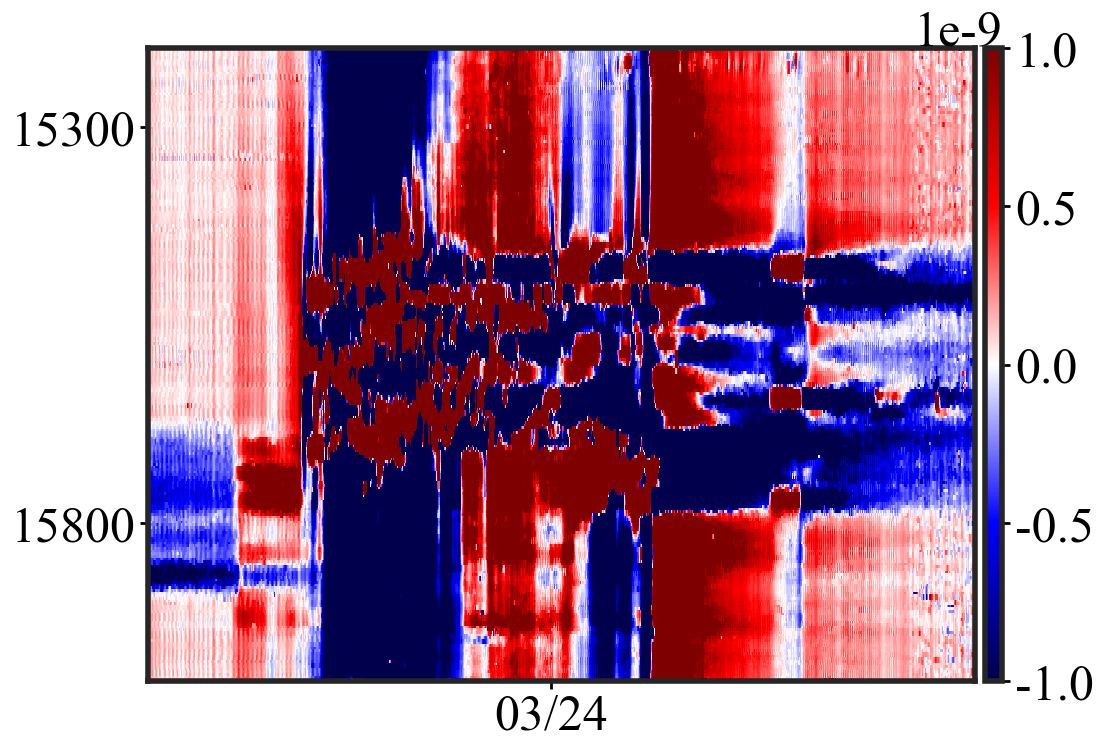

In [104]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
# 画瀑布图（对接你的 Data2D_XT）
# cmap = plt.get_cmap('jet').copy()
# cmap.set_bad('white')  # NaN 分隔带显示白色
DASdata = Data2D_XT.Data2D()
DASdata.data = data_clean                 # (N_ch, M_t)
DASdata.taxis = t_sub                   # 仍然是“相对秒”
DASdata.daxis = md_sub                  # 现在是 MD（ft），含 NaN 分隔也 OK
DASdata.start_time = start_time       # 搭配 use_timestamp=True 才能显示绝对时间刻度

#adjust the size

fig, ax = plt.subplots(figsize=(10, 7), layout='constrained')  # 宽 12 英寸，高 6 英寸

# DASdata.plot_waterfall(timescale='second',use_timestamp=True,timefmt = '%m/%d\n%H:%M:%S.{ms}')
DASdata.plot_waterfall(timescale='second', use_timestamp=True, cmap=plt.get_cmap('seismic'), xtickN=5, interpolation='nearest')#interpolation='nearest' 或 'bilinear' #antialiased

ax = plt.gca()
im = ax.images[-1]
im.set_norm(TwoSlopeNorm(vmin=-1e-9, vcenter=0, vmax=1e-9))  # 以 0 为中心
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%",pad=0.1)  # 调整 3.5% 为你想要的宽度
cbar = fig.colorbar(im,cax=cax, ax=ax) # pad 调整颜色条与图的距离pad 数值越大越远（相对于轴宽度的比例）

# cbar.set_label(r'Strain change, $\mu\varepsilon$', rotation=90, labelpad=10)
# plt.clim(-1e-8, 1e-8)
cbar.set_ticks([-1e-9, -0.5e-9, 0, 0.5e-9, 1e-9])                 # 或 cbar.ax.yaxis.set_major_locator(FixedLocator([...]))
# cbar.set_ticklabels([r'$-1$', r'$-0.5$', r'$0$', r'$0.5$', r'$1$'])


# ax.set_ylabel("Measured Depth (ft)", fontweight='bold')
# ax.set_xlabel("Date",     fontweight='bold')

#S6
# # X 轴
# ax.set_xticks([datetime.datetime(2019,4,1,19,00,00),datetime.datetime(2019,4,1,23,00,00)])                     # 位置（数据坐标）
# ax.set_xticklabels(['2019-04-01','2019-04-01'])     # 文本（与上面位置一一对应）

# ax.set_yticks([17400, 17600, 17800,18000])                     # 位置（数据坐标）
# ax.set_yticklabels(['17400', '17600', '17800', '18000'])     # 文本（与上面位置一一对应）


# S22
# ax.set_xticks([start_time + timedelta(minutes=100), datetime.datetime(2019,4,7,7,6,27)+ timedelta(minutes=40)])                     # 位置（数据坐标）
# # ax.set_xticklabels(['2019-04-07','2019-04-07'])     # 文本（与上面位置一一对应）
# ax.set_xticklabels(['','']) 

ticks = [
    datetime.datetime(2019,3,24,3,0,0) + timedelta(days=i*2) for i in range(1)
]
ax.set_xticks(ticks)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))


ax.set_yticks([ 15300,  15800])                     # 位置（数据坐标）
ax.set_yticklabels([  '15300',  '15800'])     # 文本（与上面位置一一对应/）




# 均匀间隔
# ax.xaxis.set_major_locator(MultipleLocator(3600))     # 每 3600 秒一个大刻度
# ax.yaxis.set_major_locator(MultipleLocator(5000))     # 每 2000 ft 一个大刻度

# # 控制刻度文本格式（自定义函数）
# ax.xaxis.set_major_formatter(FuncFormatter(lambda v, pos: f'{v/3600:.1f} h'))
# ax.yaxis.set_major_formatter(FuncFormatter(lambda v, pos: f'{v:.0f}'))






# plt.tight_layout()
plt.savefig('waterfall_HFTS2_B1H(B4H)_S17.png', dpi=600, bbox_inches='tight', pad_inches=0.05)
# plt.savefig('waterfall_HFTS2_S22.png')

